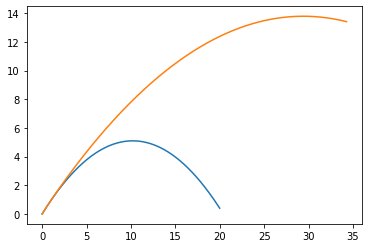

In [18]:
import math
import numpy as np
%matplotlib inline
from matplotlib import pyplot as pp

MODEL_G = 9.81
MODEL_DM = 0.2        #изменение массы ракеты(засчет сгорания топлива)
MODEL_DT = 0.001  
MODEL_DU = 20         #cкорость газа относительно ракеты

class Body:
    def __init__(self, x, y, vx, vy):

        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        
        self.trajectory_x = []
        self.trajectory_y = []
        

    def advance(self):

        self.trajectory_x.append(self.x)
        self.trajectory_y.append(self.y)
        
        self.x += self.vx * MODEL_DT
        self.y += self.vy * MODEL_DT
        self.vy -= MODEL_G * MODEL_DT
        
class Rocket(Body):
    def __init__(self, x, y, m):
        super().__init__(x, y, 10, 10)
        self.m = m

    def advance(self):
        super().advance() 
        if (self.m >= 30):
            self.m -= MODEL_DM
            v = (self.vx ** 2 + self.vy ** 2) ** 0.5
            dv = MODEL_DU * MODEL_DM / self.m        #Изменение всей скрости за dt (не считая силу тяжести)
            self.vx += dv * self.vx / v             #Изменение проекции скорости
            self.vy += dv * self.vy / v
            


b = Body(0, 0, 10, 10)
r = Rocket(0, 0, 50)

bodies = [b, r]


for t in np.r_[0:2:MODEL_DT]: 
    for b in bodies: 
        b.advance() 
        


for b in bodies: 
    pp.plot(b.trajectory_x, b.trajectory_y) 
pp.show()